# Import and Install Packages

In [ ]:
! pip install xgboost
!pip install catboost
! pip install lightgbm==3.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.6/76.6 MB 10.4 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 43.4 MB/s eta 0:00:00
  Attempting uninstall: lightgbm
    Found existing installation: lightgbm 2.2.3
    Uninstalling lightgbm-2.2.3:
      Successfully uninstalled lightgbm-2.2.3


In [ ]:
import sys
import joblib
sys.modules['sklearn.externals.joblib'] = joblib

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

from mlxtend.feature_selection import SequentialFeatureSelector as SFS

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import ExtraTreeRegressor
import xgboost as xgb
import lightgbm as lgb
import catboost as cb

In [ ]:
pd.set_option('max_columns', 100)

# Read Data

In [ ]:
train_df = pd.read_csv('/content/drive/MyDrive/Competitions/JOBATHON 2023/train_BRCpofr.csv')
test_df = pd.read_csv('/content/drive/MyDrive/Competitions/JOBATHON 2023/test_koRSKBP.csv')

In [ ]:
print(train_df.shape)
train_df.head()

(89392, 12)


,id,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,policy,type_of_policy,cltv
0,1,Male,Urban,Bachelor,5L-10L,1,5,5790,More than 1,A,Platinum,64308
1,2,Male,Rural,High School,5L-10L,0,8,5080,More than 1,A,Platinum,515400
2,3,Male,Urban,Bachelor,5L-10L,1,8,2599,More than 1,A,Platinum,64212
3,4,Female,Rural,High School,5L-10L,0,7,0,More than 1,A,Platinum,97920
4,5,Male,Urban,High School,More than 10L,1,6,3508,More than 1,A,Gold,59736


# Exploratory Data Analysis

In [ ]:
train_df.head()

,id,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,policy,type_of_policy,cltv
0,1,Male,Urban,Bachelor,5L-10L,1,5,5790,More than 1,A,Platinum,64308
1,2,Male,Rural,High School,5L-10L,0,8,5080,More than 1,A,Platinum,515400
2,3,Male,Urban,Bachelor,5L-10L,1,8,2599,More than 1,A,Platinum,64212
3,4,Female,Rural,High School,5L-10L,0,7,0,More than 1,A,Platinum,97920
4,5,Male,Urban,High School,More than 10L,1,6,3508,More than 1,A,Gold,59736


### Outlier Analysis

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


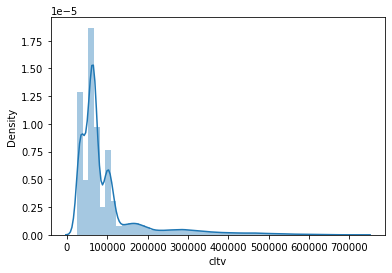

In [ ]:
sns.distplot(train_df['cltv'])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


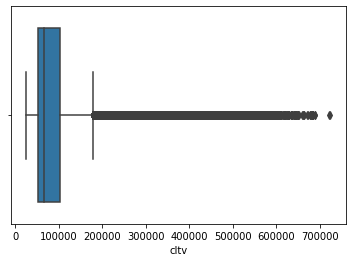

In [ ]:
sns.boxplot(train_df['cltv'])

In [ ]:
train_df['cltv'].describe()

count     89392.000000
mean      97952.828978
std       90613.814793
min       24828.000000
25%       52836.000000
50%       66396.000000
75%      103440.000000
max      724068.000000
Name: cltv, dtype: float64

# Data Preprocessing

In [ ]:
train_df = train_df[train_df['cltv']<=400000].reset_index(drop=True)
train_df.head()

,id,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,policy,type_of_policy,cltv
0,1,Male,Urban,Bachelor,5L-10L,1,5,5790,More than 1,A,Platinum,64308
1,3,Male,Urban,Bachelor,5L-10L,1,8,2599,More than 1,A,Platinum,64212
2,4,Female,Rural,High School,5L-10L,0,7,0,More than 1,A,Platinum,97920
3,5,Male,Urban,High School,More than 10L,1,6,3508,More than 1,A,Gold,59736
4,6,Male,Rural,High School,More than 10L,1,1,0,1,C,Gold,348768


In [ ]:
train_df.shape, test_df.shape

((87252, 12), (59595, 11))

# Feature Engineering

## Feature Generation

### Mean Encoding

In [ ]:
train_df.head()

,id,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,policy,type_of_policy,cltv
0,1,Male,Urban,Bachelor,5L-10L,1,5,5790,More than 1,A,Platinum,64308
1,2,Male,Rural,High School,5L-10L,0,8,5080,More than 1,A,Platinum,515400
2,3,Male,Urban,Bachelor,5L-10L,1,8,2599,More than 1,A,Platinum,64212
3,4,Female,Rural,High School,5L-10L,0,7,0,More than 1,A,Platinum,97920
4,5,Male,Urban,High School,More than 10L,1,6,3508,More than 1,A,Gold,59736


In [ ]:
def cal_avg_claim_vint(x):
  ca, v = x[0], x[1]
  if v==0:
    return ca
  else:
    return ca/v
train_df['Avg_Claim_Vint'] = train_df[['claim_amount','vintage']].apply(cal_avg_claim_vint, axis=1)
test_df['Avg_Claim_Vint'] = test_df[['claim_amount','vintage']].apply(cal_avg_claim_vint, axis=1)

In [ ]:
def bin_claim_amount(x):
  if x<=5000:
    return 1
  elif 5000<x<=10000:
    return 2
  elif 10000<x<=15000:
    return 3
  elif 15000<x<=20000:
    return 4
  elif 20000<x<=25000:
    return 5
  elif 25000<x<=30000:
    return 6
  else:
    return 7

train_df['Bin_Claim_Amount'] = train_df['claim_amount'].apply(bin_claim_amount)
test_df['Bin_Claim_Amount'] = test_df['claim_amount'].apply(bin_claim_amount)

In [ ]:
cat_cols = ['gender','income','type_of_policy','Bin_Claim_Amount']
for col in cat_cols:
    mapper_dict = train_df.groupby(col).agg({'cltv':['median']}).to_dict()['cltv', 'median']
    train_df[f'{col}_cltv_mean'] = train_df[col].map(mapper_dict)
    test_df[f'{col}_cltv_mean'] = test_df[col].map(mapper_dict)

In [ ]:
train_df['area + Policy']=train_df['area']+'_'+train_df['policy']
train_df['area + vintage']=train_df['area']+'_'+train_df['vintage'].astype(str)
train_df['area + income']=train_df['area']+'_'+train_df['income']
train_df['area + Bin_Claim_Amount']=train_df['area']+'_'+train_df['Bin_Claim_Amount'].astype(str)
train_df['income + Policy']=train_df['income']+'_'+train_df['policy']
train_df['income + vintage']=train_df['income']+'_'+train_df['vintage'].astype(str)
train_df['income + Bin_Claim_Amount']=train_df['income']+'_'+train_df['Bin_Claim_Amount'].astype(str)
train_df['num_policies + Policy']=train_df['num_policies']+'_'+train_df['policy']
train_df['num_policies + vintage']=train_df['num_policies']+'_'+train_df['vintage'].astype(str)
train_df['num_policies + income']=train_df['num_policies']+'_'+train_df['income']
train_df['num_policies + Bin_Claim_Amount']=train_df['num_policies']+'_'+train_df['Bin_Claim_Amount'].astype(str)
train_df['type_of_policy + Policy']=train_df['type_of_policy']+'_'+train_df['policy']
train_df['type_of_policy + vintage']=train_df['type_of_policy']+'_'+train_df['vintage'].astype(str)
train_df['type_of_policy + income']=train_df['type_of_policy']+'_'+train_df['income']
train_df['type_of_policy + Bin_Claim_Amount']=train_df['type_of_policy']+'_'+train_df['Bin_Claim_Amount'].astype(str)

test_df['area + Policy']=test_df['area']+'_'+test_df['policy']
test_df['area + vintage']=test_df['area']+'_'+test_df['vintage'].astype(str)
test_df['area + income']=test_df['area']+'_'+test_df['income']
test_df['area + Bin_Claim_Amount']=test_df['area']+'_'+test_df['Bin_Claim_Amount'].astype(str)
test_df['income + Policy']=test_df['income']+'_'+test_df['policy']
test_df['income + vintage']=test_df['income']+'_'+test_df['vintage'].astype(str)
test_df['income + Bin_Claim_Amount']=test_df['income']+'_'+test_df['Bin_Claim_Amount'].astype(str)
test_df['num_policies + Policy']=test_df['num_policies']+'_'+test_df['policy']
test_df['num_policies + vintage']=test_df['num_policies']+'_'+test_df['vintage'].astype(str)
test_df['num_policies + income']=test_df['num_policies']+'_'+test_df['income']
test_df['num_policies + Bin_Claim_Amount']=test_df['num_policies']+'_'+test_df['Bin_Claim_Amount'].astype(str)
test_df['type_of_policy + Policy']=test_df['type_of_policy']+'_'+test_df['policy']
test_df['type_of_policy + vintage']=test_df['type_of_policy']+'_'+test_df['vintage'].astype(str)
test_df['type_of_policy + income']=test_df['type_of_policy']+'_'+test_df['income']
test_df['type_of_policy + Bin_Claim_Amount']=test_df['type_of_policy']+'_'+test_df['Bin_Claim_Amount'].astype(str)

In [ ]:
def change_val(x):
  if x=='Gold_7':
    return 'Gold_6'
  else:
    return x

test_df['type_of_policy + Bin_Claim_Amount']=test_df['type_of_policy + Bin_Claim_Amount'].apply(change_val)

def change_val(x):
  if x=='<=2L_7':
    return '<=2L_5'
  else:
    return x

test_df['income + Bin_Claim_Amount']=test_df['income + Bin_Claim_Amount'].apply(change_val)

### Label Encode

In [ ]:
le = LabelEncoder()

In [ ]:
cat_cols = ['gender','area','qualification','income','num_policies','policy','type_of_policy',
            'type_of_policy + Policy', 'type_of_policy + vintage', 'type_of_policy + income',
            'num_policies + Policy','num_policies + vintage','num_policies + income',
            'num_policies + Bin_Claim_Amount', 'type_of_policy + Bin_Claim_Amount',
            'area + Policy','area + vintage','area + income','area + Bin_Claim_Amount',
            'income + Policy','income + vintage','income + Bin_Claim_Amount']
for col in cat_cols:
  le.fit(train_df[col])
  train_df[col] = le.transform(train_df[col])
  test_df[col] = le.transform(test_df[col])

In [ ]:
train_df.shape, test_df.shape

((87252, 33), (59595, 32))

## Feature Selection

In [ ]:
sfs = SFS(xgb.XGBRegressor(objective= 'reg:squarederror',tree_method="gpu_hist"),
           k_features=31, 
           forward=True, 
           floating=False, 
           verbose=2,
           scoring='r2',
           cv=5)
#
sfs = sfs.fit(train_df.drop(['id','cltv'], axis=1), train_df['cltv'])

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  31 out of  31 | elapsed:  1.1min finished

[2023-01-22 17:36:22] Features: 1/31 -- score: 0.1753359623086348[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:  1.0min finished

[2023-01-22 17:37:23] Features: 2/31 -- score: 0.18222377399604062[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  29 out of  29 | elapsed:  1.1min finished

[2023-01-22 17:38:28] Features: 3/31 -- score: 0.1842204944662459[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 

In [ ]:
res_df = pd.DataFrame.from_dict(sfs.get_metric_dict()).T
res_df

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
1,"(26,)","[0.17611818382314315, 0.17193882163592555, 0.1...",0.175336,"(num_policies + Bin_Claim_Amount,)",0.007933,0.006172,0.003086
2,"(16, 26)","[0.18414691763586777, 0.17869901319123493, 0.1...",0.182224,"(area + Policy, num_policies + Bin_Claim_Amount)",0.008889,0.006916,0.003458
3,"(6, 16, 26)","[0.18697353994217614, 0.1803000209266603, 0.17...",0.18422,"(claim_amount, area + Policy, num_policies + B...",0.009635,0.007497,0.003748
4,"(6, 16, 26, 29)","[0.1881734755634793, 0.18234374040373014, 0.17...",0.185392,"(claim_amount, area + Policy, num_policies + B...",0.009685,0.007536,0.003768
5,"(4, 6, 16, 26, 29)","[0.1884936719874023, 0.18354088545471314, 0.18...",0.186419,"(marital_status, claim_amount, area + Policy, ...",0.009784,0.007612,0.003806
6,"(0, 4, 6, 16, 26, 29)","[0.18871998740982876, 0.1839139626555365, 0.18...",0.1868,"(gender, marital_status, claim_amount, area + ...",0.010104,0.007861,0.00393
7,"(0, 2, 4, 6, 16, 26, 29)","[0.18908041087021188, 0.18418006209187043, 0.1...",0.187015,"(gender, qualification, marital_status, claim_...",0.009942,0.007735,0.003868
8,"(0, 2, 4, 6, 16, 24, 26, 29)","[0.1890847131861999, 0.18422040867999545, 0.18...",0.187202,"(gender, qualification, marital_status, claim_...",0.010037,0.007809,0.003904
9,"(0, 2, 4, 6, 16, 20, 24, 26, 29)","[0.18851009842959443, 0.18482084695582446, 0.1...",0.187419,"(gender, qualification, marital_status, claim_...",0.009849,0.007663,0.003831
10,"(0, 2, 4, 6, 16, 20, 24, 26, 27, 29)","[0.1885513839645251, 0.1849918167230885, 0.182...",0.187605,"(gender, qualification, marital_status, claim_...",0.00977,0.007601,0.003801


In [ ]:
xgb_selected_feats = list(res_df.values[9][3])

In [ ]:
xgb_selected_feats = ['gender',
 'qualification',
 'marital_status',
 'claim_amount',
 'area + Policy',
 'income + Policy',
 'num_policies + vintage',
 'num_policies + Bin_Claim_Amount',
 'type_of_policy + Policy',
 'type_of_policy + income']

In [ ]:
X_train = train_df.drop(['id','cltv'], axis=1)
y_train = train_df['cltv']
X_test = test_df.drop(['id'], axis=1)

In [ ]:
X_train.shape, X_test.shape

((87252, 31), (59595, 31))

# Modelling

## LightGBM

In [ ]:
lgb_params = {
 'max_depth':range(8,17,2),
 'num_leaves':range(5,13, 3),
 'learning_rate':np.linspace(0.05, 0.2, 10)
}

In [ ]:
lgb_Grid = GridSearchCV(estimator = lgb.LGBMRegressor(),
                        param_grid = lgb_params, scoring='r2', cv=5, verbose=2)

In [ ]:
lgb_Grid.fit(X_train[lgb_selected_feats], y_train)

Fitting 5 folds for each of 150 candidates, totalling 750 fits
[CV] END ......learning_rate=0.05, max_depth=8, num_leaves=5; total time=   0.5s
[CV] END ......learning_rate=0.05, max_depth=8, num_leaves=5; total time=   0.5s
[CV] END ......learning_rate=0.05, max_depth=8, num_leaves=5; total time=   0.5s
[CV] END ......learning_rate=0.05, max_depth=8, num_leaves=5; total time=   0.5s
[CV] END ......learning_rate=0.05, max_depth=8, num_leaves=5; total time=   0.6s
[CV] END ......learning_rate=0.05, max_depth=8, num_leaves=8; total time=   0.6s
[CV] END ......learning_rate=0.05, max_depth=8, num_leaves=8; total time=   0.6s
[CV] END ......learning_rate=0.05, max_depth=8, num_leaves=8; total time=   0.6s
[CV] END ......learning_rate=0.05, max_depth=8, num_leaves=8; total time=   0.6s
[CV] END ......learning_rate=0.05, max_depth=8, num_leaves=8; total time=   0.6s
[CV] END .....learning_rate=0.05, max_depth=8, num_leaves=11; total time=   0.6s
[CV] END .....learning_rate=0.05, max_depth=8,

GridSearchCV(cv=5, estimator=LGBMRegressor(),
             param_grid={'learning_rate': array([0.05      , 0.06666667, 0.08333333, 0.1       , 0.11666667,
       0.13333333, 0.15      , 0.16666667, 0.18333333, 0.2       ]),
                         'max_depth': range(8, 17, 2),
                         'num_leaves': range(5, 13, 3)},
             scoring='r2', verbose=2)

In [ ]:
lgb_Grid.best_score_

0.1606777423074746

In [ ]:
lgb_Grid.best_params_

{'learning_rate': 0.11666666666666668, 'max_depth': 8, 'num_leaves': 5}

- **Modelling.**

In [ ]:
lgb_model = lgb.LGBMRegressor(learning_rate= 0.11666666666666668, max_depth= 8, num_leaves= 5)

In [ ]:
lgb_model.fit(X_train[lgb_selected_feats], y_train)

LGBMRegressor(learning_rate=0.11666666666666668, max_depth=8, num_leaves=5)

In [ ]:
lgb_preds_tr = lgb_model.predict(X_train[lgb_selected_feats])

In [ ]:
lgb_preds = lgb_model.predict(X_test[lgb_selected_feats])

In [ ]:
lgb_preds

array([ 92489.5999696 , 130704.28365256,  91563.45488187, ...,
       107159.87341932, 105902.16703406, 112650.76559271])

## XGBoost

In [ ]:
xgb_params = {
    'n_estimators':range(90, 110, 5),
 'max_depth':range(2,5,1),
 'gamma':range(1,4,2),
 'learning_rate':np.linspace(0.08, 0.11, 5)
}

In [ ]:
xgb_Grid = GridSearchCV(estimator = xgb.XGBRegressor(objective= 'reg:squarederror',tree_method="gpu_hist"),
                        param_grid = xgb_params, scoring='r2', cv=5, verbose=2)

In [ ]:
xgb_Grid.fit(X_train[xgb_selected_feats], y_train)

Fitting 5 folds for each of 120 candidates, totalling 600 fits
[CV] END gamma=1, learning_rate=0.08, max_depth=2, n_estimators=90; total time=   0.6s
[CV] END gamma=1, learning_rate=0.08, max_depth=2, n_estimators=90; total time=   0.5s
[CV] END gamma=1, learning_rate=0.08, max_depth=2, n_estimators=90; total time=   0.6s
[CV] END gamma=1, learning_rate=0.08, max_depth=2, n_estimators=90; total time=   0.6s
[CV] END gamma=1, learning_rate=0.08, max_depth=2, n_estimators=90; total time=   0.6s
[CV] END gamma=1, learning_rate=0.08, max_depth=2, n_estimators=95; total time=   0.6s
[CV] END gamma=1, learning_rate=0.08, max_depth=2, n_estimators=95; total time=   0.6s
[CV] END gamma=1, learning_rate=0.08, max_depth=2, n_estimators=95; total time=   0.5s
[CV] END gamma=1, learning_rate=0.08, max_depth=2, n_estimators=95; total time=   0.5s
[CV] END gamma=1, learning_rate=0.08, max_depth=2, n_estimators=95; total time=   0.8s
[CV] END gamma=1, learning_rate=0.08, max_depth=2, n_estimators=100

GridSearchCV(cv=5,
             estimator=XGBRegressor(objective='reg:squarederror',
                                    tree_method='gpu_hist'),
             param_grid={'gamma': range(1, 4, 2),
                         'learning_rate': array([0.08  , 0.0875, 0.095 , 0.1025, 0.11  ]),
                         'max_depth': range(2, 5),
                         'n_estimators': range(90, 110, 5)},
             scoring='r2', verbose=2)

In [ ]:
xgb_Grid.best_score_

0.16154198871834213

In [ ]:
xgb_Grid.best_params_

{'gamma': 1, 'learning_rate': 0.08, 'max_depth': 3, 'n_estimators': 105}

- **Modelling.**

In [ ]:
xgb_model = xgb.XGBRegressor(gamma= 1, learning_rate= 0.08, max_depth= 3,
                             n_estimators= 105, objective='reg:squarederror', tree_method="gpu_hist")

In [ ]:
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', tree_method="gpu_hist")

In [ ]:
xgb_model.fit(X_train[xgb_selected_feats], y_train)

XGBRegressor(objective='reg:squarederror', tree_method='gpu_hist')

In [ ]:
xgb_preds = xgb_model.predict(X_test[xgb_selected_feats])

In [ ]:
xgb_preds

array([ 89568.65 , 115924.055,  91610.1  , ..., 101411.99 ,  97156.   ,
       106741.625], dtype=float32)

## Catboost

In [ ]:
cb_params = {
    'iterations':range(70, 200, 10),
 'depth':range(4,8,1),
 'learning_rate':np.linspace(0.05, 0.15, 10)
}

In [ ]:
cb_Grid = GridSearchCV(estimator = cb.CatBoostRegressor(verbose=0),
                        param_grid = cb_params, scoring='r2', cv=5, verbose=2)

In [ ]:
cb_Grid.fit(X_train[cb_selected_feats], y_train)

Fitting 5 folds for each of 520 candidates, totalling 2600 fits
[CV] END .........depth=4, iterations=70, learning_rate=0.05; total time=   0.6s
[CV] END .........depth=4, iterations=70, learning_rate=0.05; total time=   0.6s
[CV] END .........depth=4, iterations=70, learning_rate=0.05; total time=   0.6s
[CV] END .........depth=4, iterations=70, learning_rate=0.05; total time=   0.6s
[CV] END .........depth=4, iterations=70, learning_rate=0.05; total time=   0.5s
[CV] END depth=4, iterations=70, learning_rate=0.061111111111111116; total time=   0.6s
[CV] END depth=4, iterations=70, learning_rate=0.061111111111111116; total time=   0.6s
[CV] END depth=4, iterations=70, learning_rate=0.061111111111111116; total time=   0.6s
[CV] END depth=4, iterations=70, learning_rate=0.061111111111111116; total time=   0.6s
[CV] END depth=4, iterations=70, learning_rate=0.061111111111111116; total time=   0.6s
[CV] END depth=4, iterations=70, learning_rate=0.07222222222222222; total time=   0.6s
[CV]

GridSearchCV(cv=5,
             estimator=<catboost.core.CatBoostRegressor object at 0x7f7015efa610>,
             param_grid={'depth': range(4, 8), 'iterations': range(70, 200, 10),
                         'learning_rate': array([0.05      , 0.06111111, 0.07222222, 0.08333333, 0.09444444,
       0.10555556, 0.11666667, 0.12777778, 0.13888889, 0.15      ])},
             scoring='r2', verbose=2)

In [ ]:
cb_Grid.best_score_ # 0.16113503392692374

0.16115330761948868

In [ ]:
cb_Grid.best_params_

{'depth': 6, 'iterations': 160, 'learning_rate': 0.05}

In [ ]:
cb_model = cb.CatBoostRegressor(verbose=0, iterations= 70)

In [ ]:
cb_model.fit(X_train[cb_selected_feats], y_train)

In [ ]:
cb_preds_tr = cb_model.predict(X_train[cb_selected_feats])

In [ ]:
cb_preds = cb_model.predict(X_test[cb_selected_feats])

In [ ]:
cb_preds

array([ 96445.84896261, 119400.95517276,  94264.04726071, ...,
       102584.16271084, 111010.51129921, 110243.64719836])

# Submission maker

In [ ]:
def sub_maker(preds, name):
  sub_df = pd.DataFrame({'id':test_df['id'], 'cltv':preds})
  sub_df.to_csv(f'{name}.csv', index=False)
  print(sub_df.head())

In [ ]:
blend = cb_preds*0.8 + xgb_preds*0.2

In [ ]:
sub_maker(blend, 'blend24')

      id           cltv
0  89393   91966.001918
1  89394  127656.336032
2  89395   95484.287616
3  89396   88844.282334
4  89397  135392.325021


# THANK YOU